# Read stack of dm3 image files

This notebook reads a stack of **.dm3** microscopy images for analysis.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

# this is the library for reading the dm3 files
# install this using 'pip install ncempy'
from ncempy.io import dm

# these are custom methods in a .py file in the same directory
import microscopy_methods as mm

### Identify the image stack file

In [6]:
# identify the image stack filename
stack_filename = 'stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3'

# get full path of the image stack file
stack_path = os.path.join(os.getcwd(), stack_filename)

### Read the file

In [8]:
# read stack data
d = mm.read_stack(stack_path)

# examine the data
for key in d:
    print('{}: {}'.format(key, d[key]))

filename: stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3
data: [[[1127 1197 1230 ... 1749 1662 1651]
  [ 996 1095 1164 ... 1703 1642 1661]
  [1134 1127 1158 ... 1741 1708 1618]
  ...
  [1565 1786 1770 ... 1676 1726 1721]
  [1688 1869 1777 ... 1764 1722 1838]
  [1707 1824 1660 ... 1717 1684 1750]]

 [[1136 1067 1289 ... 1691 1762 1698]
  [1096 1118 1231 ... 1725 1463 1549]
  [1193 1234 1206 ... 1656 1557 1513]
  ...
  [1491 1498 1473 ... 1570 1616 1491]
  [1534 1564 1524 ... 1711 1560 1491]
  [1711 1654 1567 ... 1658 1547 1483]]

 [[1570 1553 1651 ... 1602 1679 1633]
  [1815 1645 1679 ... 1653 1737 1750]
  [1781 1682 1705 ... 1722 1694 1741]
  ...
  [1796 1693 1608 ... 1449 1411 1465]
  [1792 1680 1564 ... 1604 1426 1316]
  [1604 1591 1493 ... 1616 1546 1515]]

 ...

 [[1377 1533 1604 ... 1407 1474 1680]
  [1309 1381 1454 ... 1410 1435 1597]
  [1273 1295 1311 ... 1567 1580 1556]
  ...
  [1425 1528 1531 ... 1689 1647 1635]
  [1512 1721 1587 ... 1538 1660 1677]
  [1642 1721 

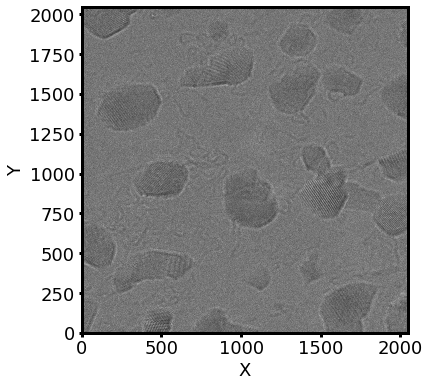

NameError: name 'feature' is not defined

In [11]:
for i in range(1, d['data'].shape[0]):

    if i % 35 == 0:
        
        img = d['data'][i-1, :, :]
        img = mm.norm_image(img)
        
        plt.imshow(img, extent=d['span'], origin='lower', cmap='gray')
        mm.plot_setup()
        plt.show()
        
        # Compute the Canny filter for two values of sigma
        edges1 = feature.canny(img, sigma=1)
        edges2 = feature.canny(img, sigma=1.5)

        plt.imshow(edges1, extent=d['span'], origin='lower', cmap='gray')
        mm.plot_setup()
        plt.show()
        
        plt.imshow(edges2, extent=d['span'], origin='lower', cmap='gray')  
        mm.plot_setup()
        plt.show()
        
        
        

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_patch'

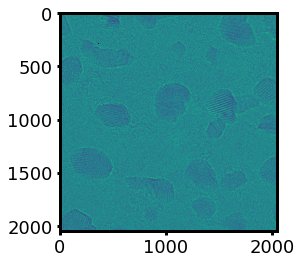

In [17]:

blobs = blob_dog(img, max_sigma=30, threshold=.1) * np.sqrt(2)
     
plt.imshow(img)
for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r,linewidth=2, fill=False)
    plt.add_patch(c)

mm.plot_setup()
plt.show()

array([[2894.89516218, 2490.43008334,   37.96250625],
       [2894.89516218, 2214.65843868,   37.96250625],
       [2894.89516218,  530.33008589,   37.96250625],
       ...,
       [   0.        ,  482.24682477,    9.26819   ],
       [   0.        ,  400.22243815,   14.829104  ],
       [   0.        ,   97.5807358 ,   37.96250625]])

[]

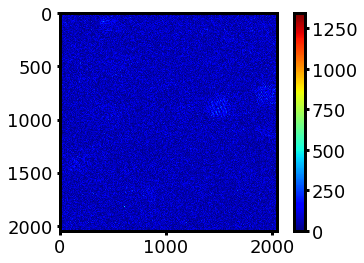

In [81]:
'''
grad_mag = np.sqrt(np.square(grad_x) + np.square(grad_y))

plt.imshow(grad_mag, cmap='jet')#, vmin=grad_mag.min(), vmax=grad_mag.max())
plt.colorbar()
plt.plot()
'''

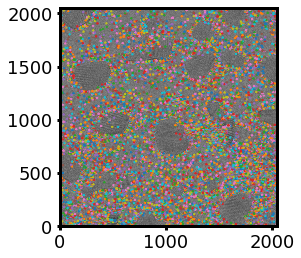

In [121]:
'''
from skimage import measure


# Find contours at a constant value of 0.8
contours = measure.find_contours(img, 0.55)

# Display the image and plot all contours found
plt.imshow(img, cmap=plt.cm.gray, origin='lower', extent=d['span'])

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()
'''